<a href="https://colab.research.google.com/github/tornadiego/ODE/blob/master/TOWARDS_DRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The modified euler can be also be expressed as 

\begin{equation*}
    k_1 = hf(y,x) \\	 
    k_2 = hf(y + k_1, x + \triangle x)  \\ 
    y(x+\triangle x) = y + \frac{1}{2} \big(k_1 + k_2\big) 
\end{equation*}


#  <center> MODEL PROBLEM </center>

Consider an object of mass $m$ which is launched from the origin in a uniform gravitational field $g$ with an initial launch speed of $v_0$ at an angle of $\alpha$ to the horizontal. For simplicity it will be assumed that the flight of the projectile is over level ground so that the end of the flight is at the same level as the beginning. In a general resisting medium the drag force at time $t$ which acts on the projectile is taken to be combination of two terms one which is dependent on speed linearly and other quadratically. The direction of which is taken to be opposite of the direction of *instaneous* velocity of the projectile. 
One can apply Newton's second law at an arbritrary time, and following differential equations could be obtained. 

$$
    m \ddot{y} = -m g - \gamma \dot{y} - \beta v \dot{y} \\ 
    m \ddot{x} = - \gamma \dot{x} - \beta v \dot{x}
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; where $ v =\sqrt{\dot{x}^2+\dot{y}^2} $ and $\gamma$ and $\beta$ are positive drag coefficients and is assumed to remain constant during the motion of the projectile. 

<!---
## Non-dimensionalising 
---
In the next step, mass is pushed into these drag constants and new constants are $ \Gamma = \gamma / m $ and $ B = \beta / m $.
$$
     \ddot{y} = -g - \Gamma \dot{y} - B v \dot{y} \\ 
     \ddot{x} = - \Gamma \dot{x} - B v \dot{x}
$$

Define;  
a new time parameter $T= \frac{t}{\tau} $ where $\tau = 1/\Gamma$ and length parameters $Y = \frac{y}{\lambda}$ and $X = \frac{x}{\lambda} $ where $ \lambda = g \tau^2$. 

This will provide you the final parameter in the problem $ D $ which is equal to $ B \lambda$. <br>
The final equation one will get through these substitiution is 

$$
     \ddot{Y} = -1 - \dot{Y} -D\ V \dot{Y} \\ 
     \ddot{X} = -\dot{X} - D\ V \dot{X}
$$

where obviously $V=\sqrt{\dot{X}^2+\dot{Y}^2}$

And remember these equation are coupled with 
$$
\dot{Y} = \frac{dY}{dt} \\
\dot{X} = \frac{dX}{dt} 
$$

Now, to update position and velocity of object (characteristics of object) according to the rules given above (equations of motion), we are going to use modified euler's algorithm. 

--->

In the next step concersion to first order couple equations is being done. We will omit $m$ by pushing into these drag constants and thus defining new constants as $ \Gamma = \gamma / m $ and $ B = \beta / m $.

$$
     \ddot{Y} = -g - \Gamma \dot{Y} -B\ V \dot{Y} \\ 
     \ddot{X} = -\Gamma \dot{X} - B\ V \dot{X}
$$

where obviously $V=\sqrt{\dot{X}^2+\dot{Y}^2}$

And remember these equation are coupled with 
$$
\dot{Y} = \frac{dY}{dt} \\
\dot{X} = \frac{dX}{dt} 
$$

In [ ]:
import matplotlib.pyplot as p
import numpy as n
from matplotlib import style
style.use('seaborn-dark-palette')
style.use('Solarize_Light2')
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

<IPython.core.display.Javascript object>


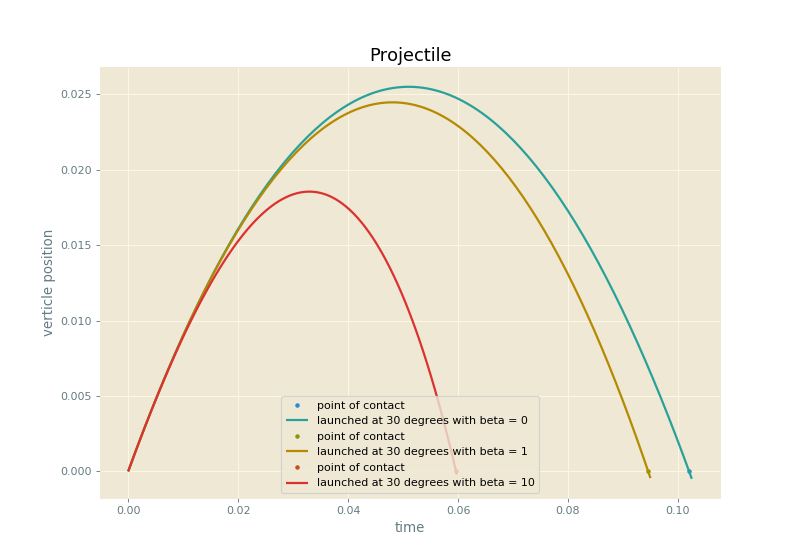

In [ ]:
#### DEFINING VARIABLE and their 'HISTORIANS'

# Defining speed as a function
def sp(X_dot, Y_dot):
    return n.sqrt(Y_dot**2+X_dot**2)

# Defining x component of acceleration as a function 
def A_x(X_dot, Y_dot):
    return -gamma*X_dot-beta*sp(X_dot, Y_dot)*X_dot

# Defining y component of acceleration as a function 
def A_y(X_dot, Y_dot):
    return -g-gamma*Y_dot-beta*sp(X_dot, Y_dot)*Y_dot

# Defining y component of velocity as a function
def V_y(Y_dot):
    return Y_dot

# Defining x component of velocity as a function
def V_x(X_dot):
    return X_dot

p.figure(figsize=(10,7)) 
p.title("Projectile")
p.xlabel("time")
p.ylabel("verticle position")

for b in [0,1,10]:
    ###### INITIAL CONDITIONS and SYSTEM PARAMETERS
    gamma = 0.
    beta = b

    # As the input parameter is initial speed and angle to horizontal 
    V =1
    alpha= n.pi/4
    g=9.8


    # initial position
    X = 0.0
    Y = 0.0
    # initial velocity
    Y_dot = V*n.sin(alpha)
    X_dot = V*n.cos(alpha)
    # # initial time
    T = 0.0
    # end time 
    T_end = 1    
    ## the step of time would del_T (unit increment in time)
    del_T = .001
    ## therefore the number of iteration you need to reach T_end
    N = int( T_end / del_T )


    T_list = n.array([T])
    X_list = n.array([X])
    Y_list = n.array([Y])
    Y_dot_list = n.array([Y_dot])
    X_dot_list = n.array([X_dot])
    # coordinates of contact
    cont=n.array([])

    #### SOLVING DE with modified euler 

    # point to be noted, we have never encountered 2-D problem before;
    # compare this with 1-D recursions, you have done.

    for i in range (N):

        # We need to update everything simultaneously, due to the coupling 
        # of equations (coupling is a fancy term for dependence!!)
        
        if (Y<=0 and Y_dot<=0):   # By brute-force, we are going to show the projectile-ground interaction. 

            # Since on collision with the ground, only y component of velocity is reversed
            Y_dot=-Y_dot

            # another thing you would notice, I have updated Y_dot earlier. See, how it can change the recursion.

            # velocity update at first point
            k1= del_T*A_x(X_dot,Y_dot)

            # velocity update at second point
            k3= del_T*A_x(X_dot+k1,Y_dot)

            # position update at first point
            k5= del_T*V_x(X_dot)

            # position update at second point
            k7= del_T*V_x(X_dot+k1)


            X     += 0.5*(k5+k7)
            X_dot += 0.5*(k1+k3)
        
        else:
            # velocity update at first point
            k1= del_T*A_x(X_dot,Y_dot)
            k2= del_T*A_y(X_dot,Y_dot)

            # velocity update at second point
            k3= del_T*A_x(X_dot+k1, Y_dot+k2)
            k4= del_T*A_y(X_dot+k1, Y_dot+k2)

            # position update at first point
            k5= del_T*V_x(X_dot)
            k6= del_T*V_y(Y_dot)

            # position update at second point
            k7= del_T*V_x(X_dot+k1)
            k8= del_T*V_y(Y_dot+k2)

            Y     += 0.5*(k6+k8)   
            X     += 0.5*(k5+k7)
            Y_dot += 0.5*(k2+k4)
            X_dot += 0.5*(k1+k3)

        # time updatation
        T +=del_T

        # 'writing the history' (updating arrays)
        T_list = n.append(T_list,T)
        Y_list = n.append(Y_list,Y)
        X_list = n.append(X_list,X)
        Y_dot_list = n.append(Y_dot_list,Y_dot)
        X_dot_list = n.append(X_dot_list,X_dot)

        # point of landing
        if Y_list[i+1]<=0 and Y_dot_list[i+1]<0:
            r=(Y_list[i+1]-Y_list[i])/(X_list[i+1]-X_list[i])
            x_coord= (X_list[i+1]-Y_list[i+1]/r)
            cont=n.append(cont,x_coord)
        
        if (Y<=0 and Y_dot<=0): break  
        
    # energy consideration 

    E_list= g*Y_list+0.5*n.sqrt(Y_dot_list**2+X_dot_list**2)
    p.plot(cont,n.zeros(len(cont)),'.',label='point of contact')
    p.plot(X_list,Y_list,label='launched at 30 degrees with beta = '+ str(beta))
    p.legend()




## corrections 

1. modelling force from the ground instead to of imposing it on velocity. And superposition of force say that you can add ground interaction to the net froce so simply adding it. 
1. Let's take in the account of the varying densities; when atmosphere thought to be isothermic $\rho = \rho_0 e^{-\frac{y}{k_B T/g}}$  and when adiabatic $\rho = \rho_0 \big( 1- ay/T_0 \big)^\alpha$. And since the Force of drag is directly proportional to density of medium, $F = \frac{\rho}{\rho_0} F^*=\big( 1- ay/T_0 \big)^\alpha \ B V^2 \hat{V} $. Therefore, our new beta is $\rho B$. $\rho_0 \neq 1$ when we will talk about situations accompanying different places as there  altitudes can be different. 
2. Temperature dependence
3. wind (constant drag)
4. varying gravtiational field
5. Coriolis force, how?
6. Adding turbulance effects through emperical results, which will have lareg number of variabes. Some of them being shape, surface, size, material (as a response to friction due to air), air type? not sure if this will account that or not.
7. 


# <center> REMOVED </center>
<pre>
        if (Y<=0 and Y_dot<=0):   # By brute-force, we are going to show the projectile-ground interaction. 

            # Since on collision with the ground, only y component of velocity is reversed
            Y_dot=-Y_dot

            # another thing you would notice, I have updated Y_dot earlier. See, how it can change the recursion.

            # velocity update at first point
            k1= del_T*A_x(X_dot,Y_dot)

            # velocity update at second point
            k3= del_T*A_x(X_dot+k1,Y_dot)

            # position update at first point
            k5= del_T*V_x(X_dot)

            # position update at second point
            k7= del_T*V_x(X_dot+k1)


            X     += 0.5*(k5+k7)
            X_dot += 0.5*(k1+k3)


        else :    
        
</pre>        

In [ ]:
cont

array([], dtype=float64)

In [ ]:
Y_list

array([ 0.        ,  0.00244566,  0.00374939,  0.00401276,  0.0033136 ,
        0.00171536, -0.00072625])

In [ ]:
Y_dot_list

array([ 0.70710678,  0.69037841,  0.6739274 ,  0.6577432 ,  0.64181572,
        0.62613534,  0.61069287,  0.59547951,  0.58048685,  0.56570683,
        0.55113176,  0.53675423,  0.52256717,  0.50856379,  0.49473757,
        0.48108228,  0.46759191,  0.45426069,  0.44108309,  0.4280538 ,
        0.41516771,  0.40241989,  0.38980563,  0.37732037,  0.36495975,
        0.35271956,  0.34059575,  0.32858444,  0.31668186,  0.30488443,
        0.29318867,  0.28159124,  0.27008895,  0.2586787 ,  0.24735754,
        0.23612261,  0.22497118,  0.21390064,  0.20290845,  0.19199221,
        0.18114962,  0.17037845,  0.15967661,  0.14904206,  0.13847289,
        0.12796727,  0.11752347,  0.10713981,  0.09681476,  0.08654682,
        0.07633461,  0.06617682,  0.05607222,  0.04601967,  0.0360181 ,
        0.02606652,  0.01616402,  0.00630978, -0.00349698, -0.01325693,
       -0.0229707 , -0.03263882, -0.04226179, -0.05184001, -0.06137383,
       -0.07086354, -0.08030935, -0.08971144, -0.09906991, -0.10

In [ ]:
n.size(Y_dot_list)

26